In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#CSV Dosya Yolu

dosya_yolu='/content/drive/MyDrive/Veri Setleri/FM 2023.csv'

#CSV Dosya Oku

df=pd.read_csv(dosya_yolu)
fm=df.copy()

**1)Öncelikle Veri Setimizi Tanıyalım.**


In [53]:
fm.head()

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,9400,Northern_European,181,4,1991/6/28,91,24,394372.0,NaN,18004457
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,9248,African_Caribbean,172,13,1998/12/20,57,27,1035616.0,NaN,85139014
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,9250,Northern_European,183,3,1988/8/21,132,76,345204.0,NaN,719601
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,8750,Northern_European,185,2,2000/7/21,21,20,394372.0,NaN,29179241
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,8750,North_African__Middle_Eastern,181,9,1992/6/15,85,47,405971.0,NaN,98028755


In [54]:
fm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 98 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 8452 non-null   object 
 1   Position                             8452 non-null   object 
 2   Age                                  8452 non-null   int64  
 3   ca                                   8452 non-null   int64  
 4   pa                                   8452 non-null   int64  
 5   Nationality                          8452 non-null   object 
 6   Club                                 8345 non-null   object 
 7   Corners                              8452 non-null   int64  
 8   Crossing                             8452 non-null   int64  
 9   Dribbling                            8452 non-null   int64  
 10  Finishing                            8452 non-null   int64  
 11  First Touch                   

*Bizim amacımız geleceği parlak oyuncuları bulmak.Ve biz bunları özellikleri üzerinden bulacağız.Bu yüzden gereksiz olan sütunları verisetimizden kaldırabiliriz.(Örn:Kulübü)*


In [55]:
istenmeyen_sutun="Club"

fm=fm.drop(istenmeyen_sutun,axis=1)



In [56]:
fm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 97 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 8452 non-null   object 
 1   Position                             8452 non-null   object 
 2   Age                                  8452 non-null   int64  
 3   ca                                   8452 non-null   int64  
 4   pa                                   8452 non-null   int64  
 5   Nationality                          8452 non-null   object 
 6   Corners                              8452 non-null   int64  
 7   Crossing                             8452 non-null   int64  
 8   Dribbling                            8452 non-null   int64  
 9   Finishing                            8452 non-null   int64  
 10  First Touch                          8452 non-null   int64  
 11  Free Kick Taking              

Yukarıda görmüş olduğumuz veri setinde ilk olarak "Forvet" pozisyonu için genç yetenekler arayacağız.Bunun içinse ilk başta özellikleri anlayabilmemiz adına görselleştirmeyi kullanıp ardından "Forvet" pozisyonu için bir oyuncuda olması gereken özellikleri yeni bir veri setine aktarıp algoritmamızı oluşturacağız.

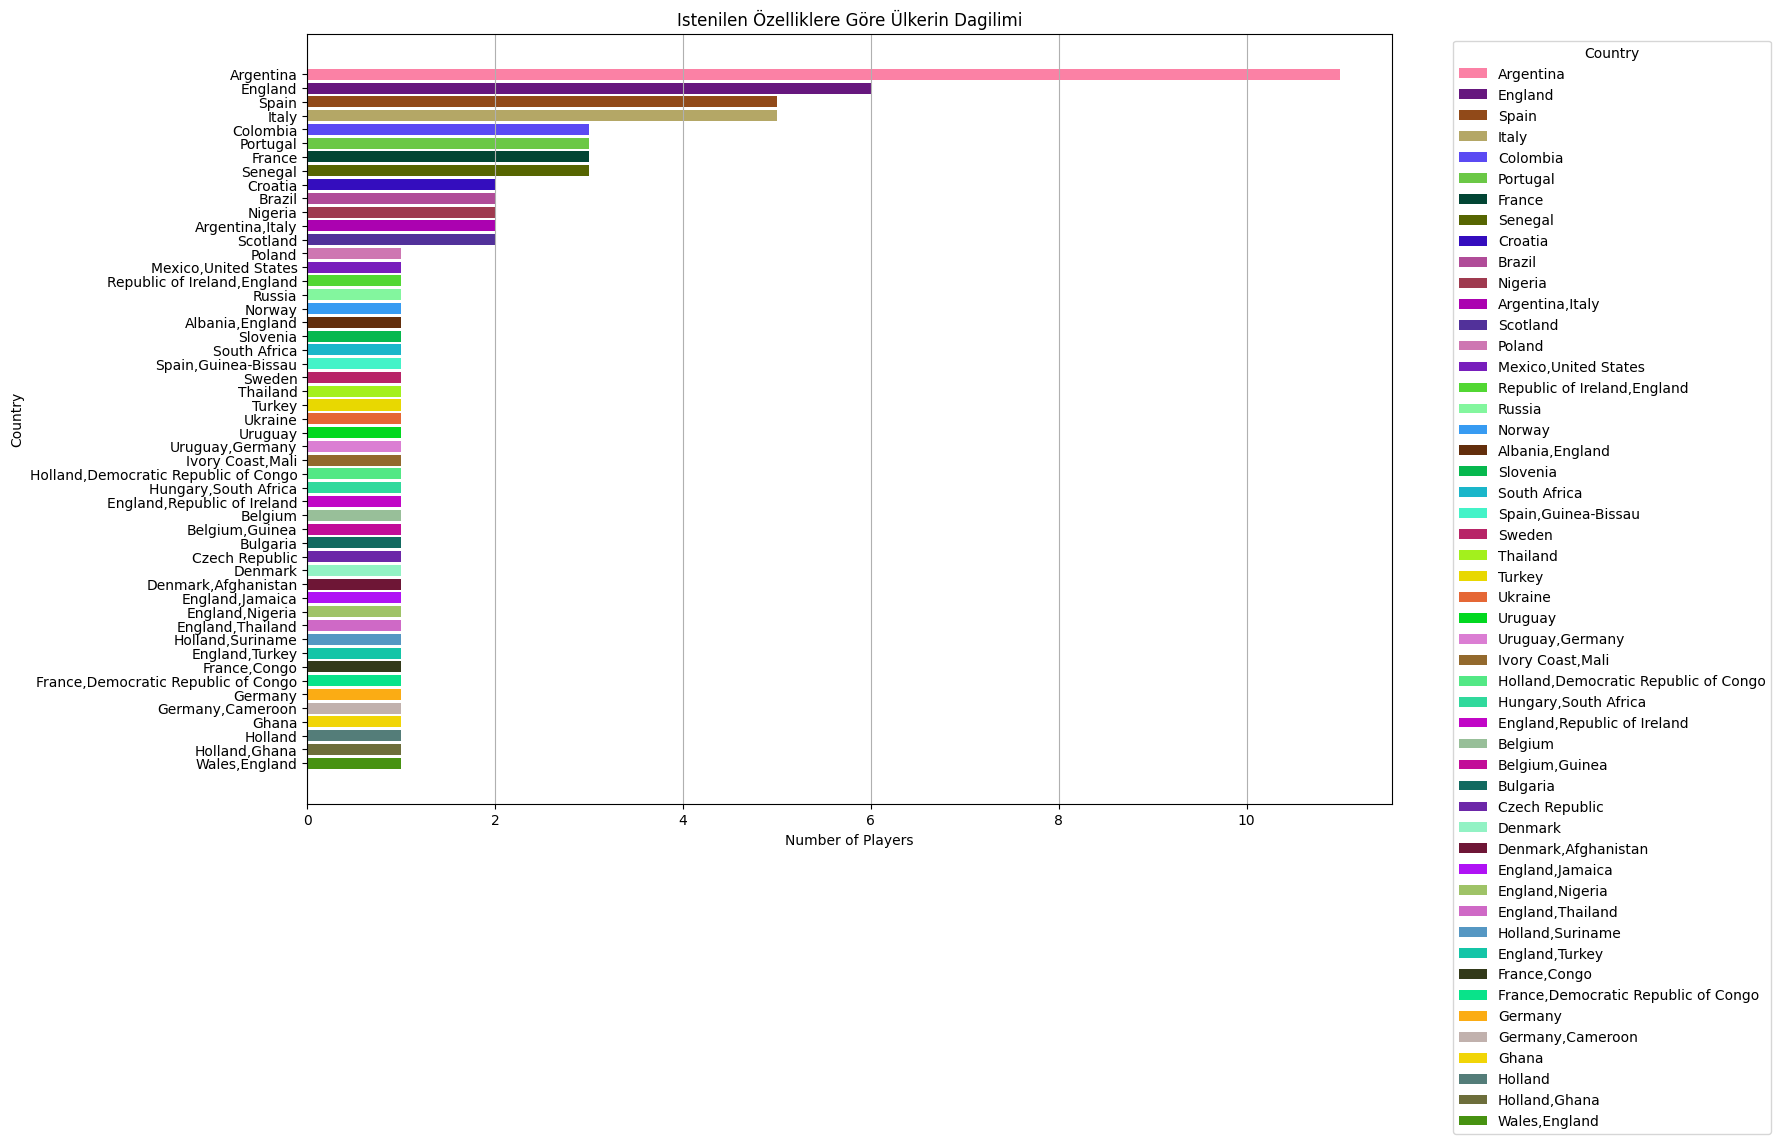

In [57]:
import matplotlib.pyplot as plt


age=21
finishing=13

ulkeler_renkler = {'Türkiye': 'red', 'İspanya': 'blue', 'Fransa': 'green', 'Almanya': 'yellow'}  # Örnek renklendirme, dilediğiniz gibi güncelleyebilirsiniz


#Yaş sütunu 25'ten küçük ve bitiricilik sütunu 18'den fazla olan futbolcuları seç
filtrelenmis_veri = fm[(fm["Age"] < age) & (fm["Finishing"] > finishing)]

#Her bir ülkenin futbolcu sayısını hesapla
ulke_futbolcu_sayisi = filtrelenmis_veri.groupby('Nationality').size().sort_values(ascending=False)



#Renkli kutunun oluşturulması
fig, ax = plt.subplots(figsize=(14, 10))
for i, (ulke, futbolcu_sayisi) in enumerate(ulke_futbolcu_sayisi.items()):
    renk = np.random.rand(3,)  # Rastgele bir RGB renk oluşturur
    ax.barh(i, futbolcu_sayisi, color=renk, label=ulke)

#Eksenleri düzenleme
ax.set_yticks(np.arange(len(ulke_futbolcu_sayisi)))
ax.set_yticklabels(ulke_futbolcu_sayisi.index)
ax.invert_yaxis()  # Ülkeleri büyükten küçüğe doğru sıralamak için yönü tersine çevir

#Görsel ayarlamalar
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.title('Istenilen Özelliklere Göre Ülkerin Dagilimi')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')
plt.show()


Şimdi sıra bir forvet oyuncusu için gerekli özelliklerin olduğu verisetimizi oluşturmakta.

In [70]:
forvet_fm=fm[['Name','UID', 'Age', 'Nationality', 'Dribbling', 'Finishing', 'First Touch', 'Heading', 'Penalty Taking', 'Technique', 'Composure', 'Concentration',
              'Flair', 'Teamwork', 'Work Rate', 'Agility', 'Balance', 'Jumping Reach', 'Pace', 'Stamina', 'Strength', 'Stability', 'Position', 'Left Foot', 'Right Foot', 'Colour of skin','Values']]

In [59]:
forvet_fm.head()

,Name,Age,Nationality,Dribbling,Finishing,First Touch,Heading,Penalty Taking,Technique,Composure,...,Jumping Reach,Pace,Stamina,Strength,Stability,Position,Left Foot,Right Foot,Colour of skin,Values
0,Kevin De Bruyne,31,Belgium,15,16,16,6,16,18,15,...,10,14,17,13,15,M/AM RLC,16,20,4,347975206
1,Kylian Mbappé,23,France,18,17,18,7,18,17,18,...,8,20,14,11,15,AM/S RL,10,20,13,347975206
2,Robert Lewandowski,33,Poland,13,19,18,17,20,16,17,...,15,14,18,16,18,S,13,20,3,347975206
3,Erling Haaland,22,"Norway,England",14,18,16,15,17,15,18,...,18,19,14,17,17,S,20,11,2,347975206
4,Mohamed Salah,30,Egypt,17,17,17,10,17,17,15,...,8,18,15,15,15,AM/S RL,20,8,9,347975206


In [60]:
forvet_fm = forvet_fm[forvet_fm['Position'].str.contains('S')]

#Pozisyonunda Forvet olmayan oyuncuları verisetinden çıkarttık.
print(forvet_fm)



                    Name  Age     Nationality  Dribbling  Finishing  \
1          Kylian Mbappé   23          France         18         17   
2     Robert Lewandowski   33          Poland         13         19   
3         Erling Haaland   22  Norway,England         14         18   
4          Mohamed Salah   30           Egypt         17         17   
5          Karim Benzema   34  France,Algeria         16         17   
...                  ...  ...             ...        ...        ...   
8439     Roman Mokrovics   16  Czech Republic         10         12   
8440       Ştefan Moraru   17         Romania         13         13   
8448          River Ries   17         Germany         11         11   
8450        Adijat Sefer   17         Germany         12          7   
8451         Linus Urban   17         Germany         10         13   

      First Touch  Heading  Penalty Taking  Technique  Composure  ...  \
1              18        7              18         17         18  ...   
2

In [61]:
forvet_fm.describe()

,Age,Dribbling,Finishing,First Touch,Heading,Penalty Taking,Technique,Composure,Concentration,Flair,...,Balance,Jumping Reach,Pace,Stamina,Strength,Stability,Left Foot,Right Foot,Colour of skin,Values
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,...,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1.620000e+03
mean,24.904938,12.304938,12.971605,12.512963,11.510494,11.355556,12.754321,11.845062,10.879012,12.567901,...,12.101235,11.012963,13.195062,12.115432,11.523457,11.992593,12.316667,18.135185,9.991975,3.463141e+07
std,5.595229,1.848051,1.782263,1.707942,2.898406,3.184389,1.739030,2.043098,2.337265,2.427138,...,2.524420,3.119083,1.738344,2.114308,3.141123,2.338537,4.260115,4.060338,20.932122,8.809285e+07
min,15.000000,5.000000,3.000000,6.000000,2.000000,1.000000,3.000000,4.000000,1.000000,2.000000,...,2.000000,1.000000,6.000000,3.000000,1.000000,4.000000,2.000000,1.000000,0.000000,-1.000000e+00
25%,20.000000,11.000000,12.000000,12.000000,10.000000,10.000000,12.000000,11.000000,9.000000,11.000000,...,11.000000,9.000000,12.000000,11.000000,9.000000,11.000000,10.000000,20.000000,4.000000,1.775614e+06
50%,25.000000,12.000000,13.000000,13.000000,12.000000,12.000000,13.000000,12.000000,11.000000,13.000000,...,12.000000,11.000000,13.000000,12.000000,12.000000,12.000000,11.000000,20.000000,7.000000,4.841000e+06
75%,29.000000,13.000000,14.000000,14.000000,14.000000,13.000000,14.000000,13.000000,12.000000,14.000000,...,14.000000,13.000000,14.000000,13.000000,14.000000,13.000000,14.000000,20.000000,13.000000,1.452882e+07
max,42.000000,20.000000,19.000000,20.000000,19.000000,20.000000,20.000000,19.000000,17.000000,20.000000,...,20.000000,20.000000,20.000000,18.000000,20.000000,20.000000,20.000000,20.000000,255.000000,3.479752e+08


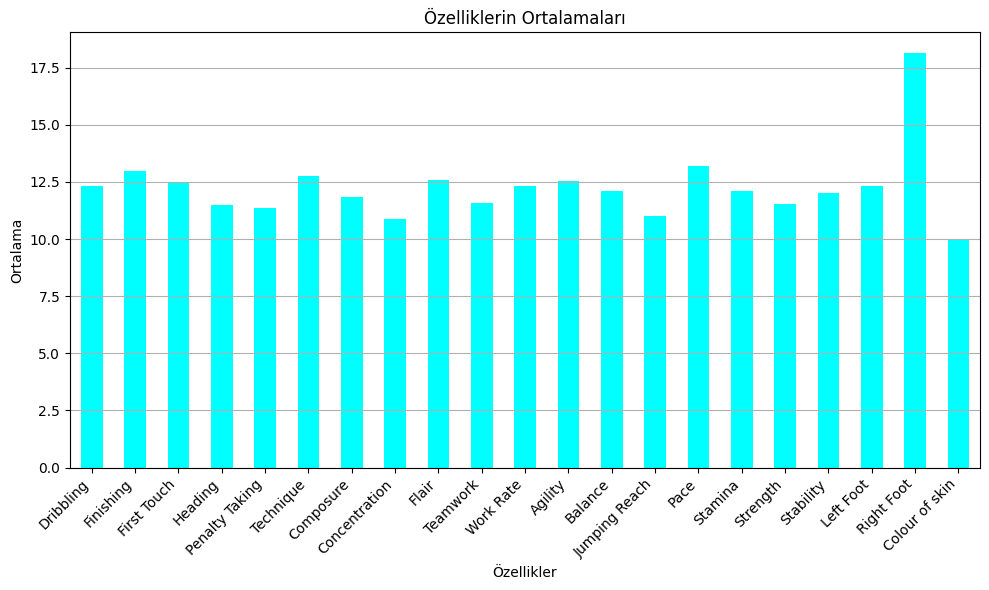

In [69]:
# Belirtilen özelliklerin ortalamasını almak için DataFrame'inizin adını ve özelliklerin adını belirtin
ortalamalar = forvet_fm[['Dribbling', 'Finishing', 'First Touch', 'Heading', 'Penalty Taking', 'Technique', 'Composure', 'Concentration', 'Flair', 'Teamwork', 'Work Rate', 'Agility', 'Balance', 'Jumping Reach', 'Pace', 'Stamina', 'Strength', 'Stability', 'Left Foot', 'Right Foot','Colour of skin',]].mean()

# Ortalamaları görselleştirme
plt.figure(figsize=(10, 6))
ortalamalar.plot(kind='bar', color='cyan')
plt.title('Özelliklerin Ortalamaları')
plt.xlabel('Özellikler')
plt.ylabel('Ortalama')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

İstediğimiz özellikteki futbolcunun yukarıda mevcut olan grafikte ortalamaların üstünde olmasına dikkat edeceğiz.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler


def get_models():
    models=[]
    #models.append(("LR",LogisticRegression()))
    #models.append(("KNN",KNeighborsClassifier()))
    #models.append(("DT",DecisionTreeClassifier()))
    models.append(("SVM rbf",SVC()))
    #models.append(("SVM linear",SVC(kernel='linear')))
    #models.append(("Random Forest C.",RandomForestClassifier()))
    #Yukarıda models adlı bir lsite oluşturup kullanmamız muhtemel modelleri içine yerleştirdik.
    return models

def cross_validation_scores_for_various_ml_models(X_cv, y_cv): #Burada ise çapraz doğrulama işlemini uygulayacağımız sınıfımız var.
    print("Çapraz Doğrulama Başarı Oranları".upper())
    models=get_models()


    results=[]
    names= []

    for name, model in models:
        kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=22) #**BURADA STRATİFY ÖZELLİĞİNİ KULLANIYORUZ.
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold,scoring="accuracy")#cross_val_score kütüphanenin içinde(sklearn.model_selection)
        names.append(name)
        results.append(cv_result)
        print("{} modelinin çapraz doğrulaması yapıldı, başarı oranı:{:0.2f}".format(name, cv_result.mean()))



X = forvet_fm.drop(['Name', 'UID', 'Nationality', 'Position','Values'], axis=1)
y=forvet_fm['Values']

X=StandardScaler().fit_transform(X)
cross_validation_scores_for_various_ml_models(X, y)



ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 